<h2>Data Ssientist Job Market Analysis In India</h2>

In [1]:
import requests
import bs4
from bs4 import BeautifulSoup

In [2]:
from time import sleep

In [3]:
import pandas as pd
import numpy as np

In [4]:
indeed_cities = ['bangalore', 'mumbai', 'hyderabad', 'chennai', 'pune', 
                 'delhi', 'kolkata']
len(indeed_cities)

7

In [5]:
max_results_per_city = 1000

results = []

for city in indeed_cities:
    for start in range(0, max_results_per_city, 50):
        url = "https://www.indeed.co.in/jobs?q=Data+Scientist&l=" + city + "&limit=50&radius=25&start=" + str(start)
        html = requests.get(url)
        soup = BeautifulSoup(html.text, 'html.parser')
        for result in soup.find_all('div', {'class':' row result'}):
            results.append(result)
        sleep(1)

In [9]:
"""import sys
sys.setrecursionlimit(5000)"""

In [11]:
"""import pickle
city_results = open("indeed_search_result.pickle", 'wb')
pickle.dump(results, city_results)
city_results.close()"""

'import pickle\ncity_results = open("indeed_search_result.pickle", \'wb\')\npickle.dump(results, city_results)\ncity_results.close()'

In [12]:
len(results)

6343

In [13]:
def get_loc(result):
    try:
        return result.find('span', {'class': 'location'}).text
    except:
        return np.nan

In [14]:
def get_comp(result):
    try:
        return result.find('span', {'class': 'company'}).text
    except:
        return np.nan

In [15]:
def get_job(result):
    try:
        return result.find('a', {'data-tn-element': 'jobTitle' }).text
    except:
        return np.nan

In [16]:
def get_sal(result):
    try:
        return result.find('span', {'class': 'no-wrap'}).text
    except:
        return np.nan

In [17]:
def get_desc(result):
    try:
        return result.find('span', {'class': 'summary'}).text
    except:
        return np.nan

In [18]:
jobs0 = pd.DataFrame(columns=['location', 'title', 'company', 'salary', 'summary'])

In [19]:
for entry in results:
    location = get_loc(entry)
    title = get_job(entry)
    #print(title)
    company = get_comp(entry)
    #print(company)
    salary = get_sal(entry)
    desc = get_desc(entry)
    #print(jobs0.loc[len(jobs0)])
    
    jobs0.loc[len(jobs0)] = [location, title, company, salary, desc]
jobs0.head()

,location,title,company,salary,summary
0,"Bengaluru, Karnataka",Data Scientist,\n Tricog Health Services Private Limited,"\n ₹6,00,000 - ₹18,00,000 a year",\n We're currently looking for peop...
1,"Bengaluru, Karnataka",Data Scientist (Entry-Level),\n Clutch.ai,NaN,\n Great big data scientists have d...
2,"Bengaluru, Karnataka",Data Scientist,\n\n TCS,NaN,"\n  Dimensionality Reduction, Neur..."
3,"Bengaluru, Karnataka",Data Scientist,\n Innohabit Technologies Pvt. Ltd,"\n ₹3,00,000 - ₹4,50,000 a year",\n Experience in Machine Learning /...
4,"Bengaluru, Karnataka",Data Scientist,\n StraVis IT Solutions Pvt. Ltd.,"\n ₹4,00,000 - ₹9,00,000 a year",\n We are looking for candidates wh...


In [20]:
#replacing the \n
jobs0 = jobs0.replace('\n', '', regex=True)

In [21]:
jobs0.head()

,location,title,company,salary,summary
0,"Bengaluru, Karnataka",Data Scientist,Tricog Health Services Private Limited,"₹6,00,000 - ₹18,00,000 a year",We're currently looking for people...
1,"Bengaluru, Karnataka",Data Scientist (Entry-Level),Clutch.ai,NaN,Great big data scientists have dif...
2,"Bengaluru, Karnataka",Data Scientist,TCS,NaN," Dimensionality Reduction, Neural..."
3,"Bengaluru, Karnataka",Data Scientist,Innohabit Technologies Pvt. Ltd,"₹3,00,000 - ₹4,50,000 a year",Experience in Machine Learning / D...
4,"Bengaluru, Karnataka",Data Scientist,StraVis IT Solutions Pvt. Ltd.,"₹4,00,000 - ₹9,00,000 a year",We are looking for candidates who ...


In [22]:
jobs0.shape

(6343, 5)

In [23]:
jobs0.isnull().sum()

location       0
title          0
company        0
salary      5684
summary        0
dtype: int64

In [24]:
#Total number of jobs listed as per company wise
from collections import Counter
company_job_list = Counter(jobs0.company)

Total_jobs_company = pd.DataFrame.from_dict(company_job_list,  orient='index').reset_index()
Total_jobs_company = Total_jobs_company.rename(columns={'index': 'company', 0:'job_count'})

Total_jobs_company['job_count'] = Total_jobs_company['job_count'].astype('int')
Total_jobs_company['company'] = Total_jobs_company['company'].astype('str')

print(Total_jobs_company.dtypes)

#sorting dataframe
df = Total_jobs_company.sort_values(by='job_count', axis=0, ascending=False).reset_index(drop = True)
df.head()

company      object
job_count     int64
dtype: object


,company,job_count
0,Rinalytics Advisors,546
1,HUQUO CONSULTING PVT. LTD.,252
2,Michael Page,205
3,Adecco,157
4,Wipro LTD,154


<b>Converting object into CSV file</b>

In [25]:
jobs0.to_csv('datascientist-job-results.csv', index=False, encoding='utf-8')

In [27]:
#Reading CSV File
df_result = pd.read_csv('datascientist-job-results.csv')

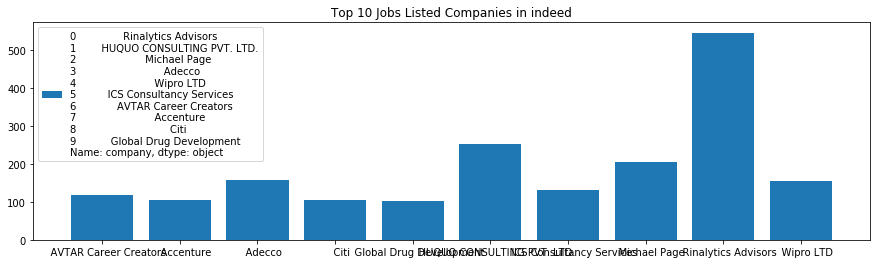

In [215]:
#Top 10 Companies listing out jobs
import matplotlib.pyplot as plt
import seaborn as sns

x = df.company[:10]
y = df.job_count[:10]

plt.figure(figsize=(15,4))
plot.bar(x,y, label=x)
plt.title("Top 10 Jobs Listed Companies in indeed")

plt.legend()
plt.show()



<b>Trending Job Titles for Data Scientists</b>

In [56]:
#Top 20 titles under the datascintist indeed category

company_title = Counter(jobs0.title)

Top_titles = pd.DataFrame.from_dict(company_title,  orient='index').reset_index()
Top_titles = Top_titles.rename(columns={'index': 'title', 0:'count_titles'})

Top_titles['count_titles'] = Top_titles['count_titles'].astype('int')
Top_titles['title'] = Top_titles['title'].astype('str')

print(Top_titles.dtypes)

#sorting dataframe
df_title = Top_titles.sort_values(by='count_titles', axis=0, ascending=False).reset_index(drop = True)
df_title.head()

df_title[:20]

title           object
count_titles     int64
dtype: object


,title,count_titles
0,Data Analyst,300
1,Data Scientist,203
2,Project Lead Big Data Analytics,37
3,Business Development (Sales) Internship,35
4,Project Manager Big Data Analytics,35
5,Senior Software Engineer,35
6,Principal Consultant - Application Development,34
7,STATISTICAL PROGRAMMER (ADAM/TLF),32
8,Database Architect,28
9,Senior Data Scientist,26


<b>Salary Information</b>

cleaning salary data

In [60]:
salaries = df_result[df_result.salary.notnull()]

In [61]:
salaries.shape

(659, 5)

In [64]:
salaries.head()

,location,title,company,salary,summary
0,"Bengaluru, Karnataka",Data Scientist,Tricog Health Services Private Limited,"₹6,00,000 - ₹18,00,000 a year",We're currently looking for people...
3,"Bengaluru, Karnataka",Data Scientist,Innohabit Technologies Pvt. Ltd,"₹3,00,000 - ₹4,50,000 a year",Experience in Machine Learning / D...
4,"Bengaluru, Karnataka",Data Scientist,StraVis IT Solutions Pvt. Ltd.,"₹4,00,000 - ₹9,00,000 a year",We are looking for candidates who ...
6,"Ulsoor, Bengaluru, Karnataka",Data Analyst- programming (Python or Ruby) / S...,Rainbow Jobs Services,"₹70,000 - ₹85,000 a month",Gathering data from various source...
15,"Bengaluru, Karnataka",Data Mining Intern,Valuechain Pvt Ltd,"₹10,000 - ₹15,000 a month",Working with Data Scientist in sup...


In [65]:

salaries = salaries[(~salaries.salary.str.contains('an hour')) & (~salaries.salary.str.contains('a month'))
                   & (~salaries.salary.str.contains('a week')) & (~salaries.salary.str.contains('a day'))]


salaries.salary = salaries.salary.str.replace('a year', '').str.replace(',', '').str.replace('₹', '')

In [66]:
salaries.head()

,location,title,company,salary,summary
0,"Bengaluru, Karnataka",Data Scientist,Tricog Health Services Private Limited,600000 - 1800000,We're currently looking for people...
3,"Bengaluru, Karnataka",Data Scientist,Innohabit Technologies Pvt. Ltd,300000 - 450000,Experience in Machine Learning / D...
4,"Bengaluru, Karnataka",Data Scientist,StraVis IT Solutions Pvt. Ltd.,400000 - 900000,We are looking for candidates who ...
89,"Bengaluru, Karnataka",Machine Learning Engineer,AIMonk Labs Private Ltd,400000 - 600000,> From data preprocessing to train...
118,"Bengaluru, Karnataka",Data Analyst,marketindia,250000 - 300000,Monitor and audit data quality. Cr...


<b>Turn salary ranges to an average and convert that into floats</b>

In [67]:
for i in salaries.salary:
    if len(i.split('-')) != 1 and len(i.split('-')) != 2:
        print (i)

In [68]:
new_salaries = []
for i in salaries.salary:
    a = i.split('-')
    if len(a) == 2:
        new_salaries.append(np.mean([float(b) for b in a]))
    else:
        new_salaries.append(float(a[0]))

In [69]:
new_salaries[0:5]

[1200000.0, 375000.0, 650000.0, 500000.0, 275000.0]

In [70]:
salaries.salary = new_salaries

In [71]:
salaries.shape

(376, 5)

In [72]:
salaries.duplicated().sum()

299

In [73]:
salaries.head()

,location,title,company,salary,summary
0,"Bengaluru, Karnataka",Data Scientist,Tricog Health Services Private Limited,1200000.0,We're currently looking for people...
3,"Bengaluru, Karnataka",Data Scientist,Innohabit Technologies Pvt. Ltd,375000.0,Experience in Machine Learning / D...
4,"Bengaluru, Karnataka",Data Scientist,StraVis IT Solutions Pvt. Ltd.,650000.0,We are looking for candidates who ...
89,"Bengaluru, Karnataka",Machine Learning Engineer,AIMonk Labs Private Ltd,500000.0,> From data preprocessing to train...
118,"Bengaluru, Karnataka",Data Analyst,marketindia,275000.0,Monitor and audit data quality. Cr...


<b>Univariate Analysis</b>

In [80]:
company_salary = round(salaries['salary'], 1)

<b>Median Salary</b>

In [83]:
company_salary.median()

500000.0

5LPA is the Average CTC for Data Scientist

<b>Mean Salary</b>

In [86]:
round(company_salary.mean(), 1)

710884.3

<b>Salary Distribution</b>

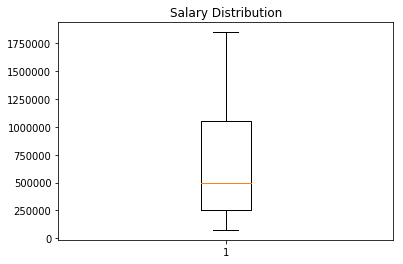

In [197]:
import matplotlib.pyplot as plot

salary_bx_plot = plot.boxplot(company_salary)
plt.title("Salary Distribution")
plt.show()

Most of the cases salary range is betweeb 2.5 to 10LPA CTC with the higest CTC of 17.5LPA

<b>Average Salary by Cities</b>

In [184]:
salary_city = salaries[['location', 'salary']]

In [185]:
#Normalizing cities
x = salary_city['location']

#Replacing cities list
norm_cities = x.replace(['Bengaluru, Karnataka',
                        'Borivali, Mumbai, Maharashtra',
                        'Mumbai, Maharashtra',
                        'Navi Mumbai, Maharashtra',
                        'Chennai, Tamil Nadu',
                        'Delhi, Delhi',
                        'New Delhi, Delhi',
                        'Gachibowli, Hyderabad, Telangana',
                        'Hyderabad, Telangana',
                        'Pune, Maharashtra', 
                        'Saket, Delhi', 
                        'Usman Road, Tamil Nadu'], ['Bengaluru', 'Mumbai', 
                                              'Mumbai', 'Mumbai', 
                                              'Chennai', 'Delhi',
                                              'Delhi', 'Hyderabad', 'Hyderabad',
                                              'Pune', 'Delhi', 'Chennai'] )
print(norm_cities[:10])

0      Bengaluru
3      Bengaluru
4      Bengaluru
89     Bengaluru
118    Bengaluru
119    Bengaluru
127    Bengaluru
188    Bengaluru
209    Bengaluru
217    Bengaluru
Name: location, dtype: object


In [189]:
salary_city['location'] = norm_cities
salary_city[:10]

/Users/afnity_computer/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,location,salary
0,Bengaluru,1200000.0
3,Bengaluru,375000.0
4,Bengaluru,650000.0
89,Bengaluru,500000.0
118,Bengaluru,275000.0
119,Bengaluru,600000.0
127,Bengaluru,800000.0
188,Bengaluru,287500.0
209,Bengaluru,100000.0
217,Bengaluru,800000.0


In [190]:
salary_city_mean = salary_city.groupby(['location'])['salary'].mean()
#round(salary_city_mean['salary'], 1)
salary_city_mean[:10]

location
Bengaluru    7.595179e+05
Chennai      8.354870e+05
Delhi        3.194560e+05
Hyderabad    1.014941e+06
Mumbai       7.201282e+05
Pune         1.709091e+05
Name: salary, dtype: float64

In [199]:
salary_city_mean = salary_city.pivot_table(index="location", values='salary', aggfunc=np.mean)

#Converting Float Values
salary_city_mean_1 = round(salary_city_mean['salary'], 0)
salary_city_mean_1

location
Bengaluru     759518.0
Chennai       835487.0
Delhi         319456.0
Hyderabad    1014941.0
Mumbai        720128.0
Pune          170909.0
Name: salary, dtype: float64

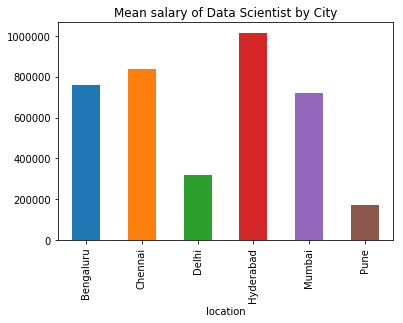

In [200]:
#Displaying output in bar chart
salary_city_mean_1.plot.bar(title="Mean salary of Data Scientist by City")
plt.show()